In [68]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

EDA

In [69]:
import warnings
warnings.filterwarnings('ignore')

In [70]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
import warnings
warnings.filterwarnings('ignore')
import xgboost
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

 


In [71]:
df=pd.read_csv('/kaggle/input/human-stress-detection-in-and-through-sleep/SaYoPillow.csv')

In [72]:
df.head()

,sr,rr,t,lm,bo,rem,sr.1,hr,sl
0,93.80,25.680,91.840,16.600,89.840,99.60,1.840,74.20,3
1,91.64,25.104,91.552,15.880,89.552,98.88,1.552,72.76,3
2,60.00,20.000,96.000,10.000,95.000,85.00,7.000,60.00,1
3,85.76,23.536,90.768,13.920,88.768,96.92,0.768,68.84,3
4,48.12,17.248,97.872,6.496,96.248,72.48,8.248,53.12,0


In [73]:
df.shape

(630, 9)

In [74]:
df.dtypes

sr      float64
rr      float64
t       float64
lm      float64
bo      float64
rem     float64
sr.1    float64
hr      float64
sl        int64
dtype: object

In [75]:
df.columns

Index(['sr', 'rr', 't', 'lm', 'bo', 'rem', 'sr.1', 'hr', 'sl'], dtype='object')

In [76]:
df.rename(columns={'sr': 'snoring rate', 'rr':'respiration rate', 't': 'body temperature', 'lm':'limb movement',
                            'bo':'blood oxygen', 'rem':'eye movement', 'sr.1':'sleeping hours', 'hr':'heart rate',
                            'sl':'stress level'}, inplace=True)
df.columns

Index(['snoring rate', 'respiration rate', 'body temperature', 'limb movement',
       'blood oxygen', 'eye movement', 'sleeping hours', 'heart rate',
       'stress level'],
      dtype='object')

In [77]:
df

,snoring rate,respiration rate,body temperature,limb movement,blood oxygen,eye movement,sleeping hours,heart rate,stress level
0,93.800,25.680,91.840,16.600,89.840,99.60,1.840,74.20,3
1,91.640,25.104,91.552,15.880,89.552,98.88,1.552,72.76,3
2,60.000,20.000,96.000,10.000,95.000,85.00,7.000,60.00,1
3,85.760,23.536,90.768,13.920,88.768,96.92,0.768,68.84,3
4,48.120,17.248,97.872,6.496,96.248,72.48,8.248,53.12,0
...,...,...,...,...,...,...,...,...,...
625,69.600,20.960,92.960,10.960,90.960,89.80,3.440,62.40,2
626,48.440,17.376,98.064,6.752,96.376,73.76,8.376,53.44,0
627,97.504,27.504,86.880,17.752,84.256,101.88,0.000,78.76,4
628,58.640,19.728,95.728,9.728,94.592,84.32,6.728,59.32,1


In [78]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
625    False
626    False
627    False
628    False
629    False
Length: 630, dtype: bool

In [79]:
df.isnull().sum()

snoring rate        0
respiration rate    0
body temperature    0
limb movement       0
blood oxygen        0
eye movement        0
sleeping hours      0
heart rate          0
stress level        0
dtype: int64

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 630 entries, 0 to 629
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   snoring rate      630 non-null    float64
 1   respiration rate  630 non-null    float64
 2   body temperature  630 non-null    float64
 3   limb movement     630 non-null    float64
 4   blood oxygen      630 non-null    float64
 5   eye movement      630 non-null    float64
 6   sleeping hours    630 non-null    float64
 7   heart rate        630 non-null    float64
 8   stress level      630 non-null    int64  
dtypes: float64(8), int64(1)
memory usage: 44.4 KB


In [81]:
df.corr()

,snoring rate,respiration rate,body temperature,limb movement,blood oxygen,eye movement,sleeping hours,heart rate,stress level
snoring rate,1.000000,0.976268,-0.902475,0.981078,-0.903140,0.950600,-0.920554,0.976268,0.975322
respiration rate,0.976268,1.000000,-0.889237,0.991738,-0.889210,0.935572,-0.891855,1.000000,0.963516
body temperature,-0.902475,-0.889237,1.000000,-0.896412,0.998108,-0.857299,0.954860,-0.889237,-0.962354
limb movement,0.981078,0.991738,-0.896412,1.000000,-0.898527,0.964703,-0.901102,0.991738,0.971071
blood oxygen,-0.903140,-0.889210,0.998108,-0.898527,1.000000,-0.862136,0.950189,-0.889210,-0.961092
eye movement,0.950600,0.935572,-0.857299,0.964703,-0.862136,1.000000,-0.893952,0.935572,0.951988
sleeping hours,-0.920554,-0.891855,0.954860,-0.901102,0.950189,-0.893952,1.000000,-0.891855,-0.973036
heart rate,0.976268,1.000000,-0.889237,0.991738,-0.889210,0.935572,-0.891855,1.000000,0.963516
stress level,0.975322,0.963516,-0.962354,0.971071,-0.961092,0.951988,-0.973036,0.963516,1.000000


In [82]:
df.describe()

,snoring rate,respiration rate,body temperature,limb movement,blood oxygen,eye movement,sleeping hours,heart rate,stress level
count,630.000000,630.000000,630.00000,630.000000,630.000000,630.000000,630.000000,630.000000,630.000000
mean,71.600000,21.800000,92.80000,11.700000,90.900000,88.500000,3.700000,64.500000,2.000000
std,19.372833,3.966111,3.52969,4.299629,3.902483,11.893747,3.054572,9.915277,1.415337
min,45.000000,16.000000,85.00000,4.000000,82.000000,60.000000,0.000000,50.000000,0.000000
25%,52.500000,18.500000,90.50000,8.500000,88.500000,81.250000,0.500000,56.250000,1.000000
50%,70.000000,21.000000,93.00000,11.000000,91.000000,90.000000,3.500000,62.500000,2.000000
75%,91.250000,25.000000,95.50000,15.750000,94.250000,98.750000,6.500000,72.500000,3.000000
max,100.000000,30.000000,99.00000,19.000000,97.000000,105.000000,9.000000,85.000000,4.000000


In [83]:
X=df.iloc[:,0:8]
y=df.iloc[:,8:]

In [84]:
y.head()

,stress level
0,3
1,3
2,1
3,3
4,0


In [85]:
X.head()

,snoring rate,respiration rate,body temperature,limb movement,blood oxygen,eye movement,sleeping hours,heart rate
0,93.80,25.680,91.840,16.600,89.840,99.60,1.840,74.20
1,91.64,25.104,91.552,15.880,89.552,98.88,1.552,72.76
2,60.00,20.000,96.000,10.000,95.000,85.00,7.000,60.00
3,85.76,23.536,90.768,13.920,88.768,96.92,0.768,68.84
4,48.12,17.248,97.872,6.496,96.248,72.48,8.248,53.12


Data Preprocesing

In [86]:
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)
X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,random_state=23)

In [88]:
2 # SVM classifier
import warnings
warnings.filterwarnings('ignore')
m2=SVC(random_state = 23)
svc_param_grid = {"kernel" : ['poly', 'rbf', 'sigmoid'],
                 "gamma": [0.001, 0.01, 0.1, 1,10],
                 "C": [1,10,50,100,200,300,1000],
                 "probability":[True]}
m2svc = GridSearchCV(m2, param_grid=svc_param_grid,cv =5,
                   scoring = "accuracy", n_jobs = -1,verbose = 1)
m2svc.fit(X_train,y_train)
print(m2svc.best_params_)
print(m2svc.score(X_test,y_test))

Fitting 5 folds for each of 105 candidates, totalling 525 fits


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

{'C': 1, 'gamma': 0.01, 'kernel': 'rbf', 'probability': True}
1.0


In [34]:
3 # Random forest bagging algorithm
m3=RandomForestClassifier(random_state=23)
rf_param_grid = {"max_features": [1,3,10,20],
                "min_samples_split":[2,3,10],
                "min_samples_leaf":[1,3,10,20],
                "bootstrap":[False],
                "n_estimators":[100,300,500],
                "criterion":["gini",'entropy']}
m3rf = GridSearchCV(m3, param_grid=rf_param_grid,cv =5,
                   scoring = "accuracy", n_jobs = -1,verbose = 1)
m3rf.fit(X_train,y_train)
print(m3rf.best_params_)
m3rf.score(X_test,y_test)




Fitting 5 folds for each of 288 candidates, totalling 1440 fits


/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed whe

{'bootstrap': False, 'criterion': 'gini', 'max_features': 1, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


0.9936708860759493

In [61]:
4 # logistic regression 
m4=LogisticRegression(random_state = 23)
logreg_param_grid = {"C":np.logspace(-3,3,10),
                    "penalty": ["l1","l2",'elasticnet']}
m4lr = GridSearchCV(m4, param_grid=logreg_param_grid,cv =5,
                   scoring = "accuracy", n_jobs = -1,verbose = 1)
m4lr.fit(X_train,y_train)
print(m4lr.best_params_)
print(m4lr.score(X_test,y_test))
# logistic regression final model=
final_model=LogisticRegression(C=0.0046,penalty='l2')
final_model.fit(X_train,y_train)
yp=final_model.predict(X_test)


Fitting 5 folds for each of 30 candidates, totalling 150 fits


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = c

{'C': 0.004641588833612777, 'penalty': 'l2'}
1.0


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

In [60]:
from sklearn.metrics import classification_report

report=pd.DataFrame(classification_report(y_test,yp,output_dict=True))
report

,0,1,2,3,4,accuracy,macro avg,weighted avg
precision,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
recall,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
f1-score,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
support,44.0,26.0,28.0,27.0,33.0,1.0,158.0,158.0


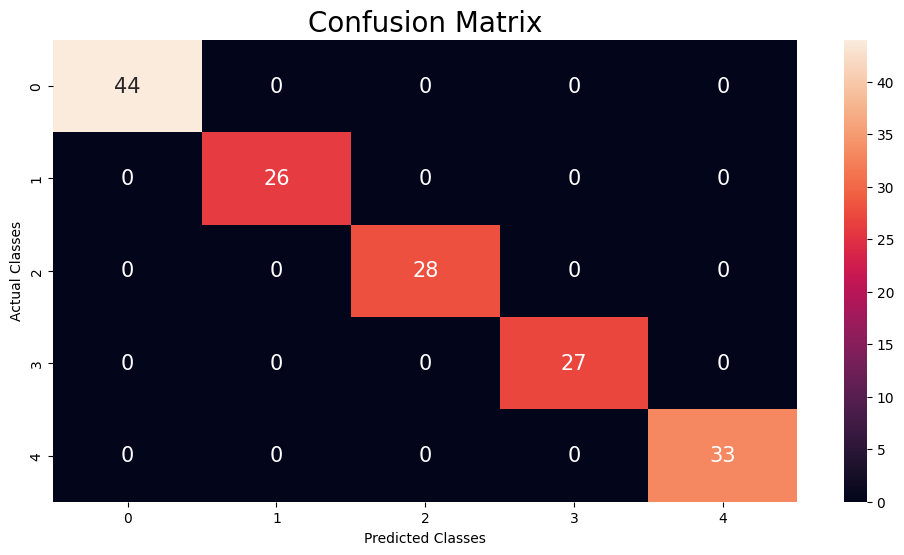

In [62]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test,yp)

cm_dataframe = pd.DataFrame(cm, columns=final_model.classes_, index=final_model.classes_)
plt.figure(figsize = (12,6));
p = sns.heatmap(cm_dataframe, annot=True, fmt="d", annot_kws={"fontsize":15});
p.set_title('Confusion Matrix', fontsize=20);
p.set_xlabel('Predicted Classes');
p.set_ylabel('Actual Classes');

In [67]:
df['stress level'].value_counts().sort_index()

stress level
0    126
1    126
2    126
3    126
4    126
Name: count, dtype: int64

In [38]:
5 # knn
m5=KNeighborsClassifier()
knn_param_grid = {"n_neighbors":[3,5],
                 "weights": ["uniform","distance"],
                 "metric":["euclidean","manhattan"]}
m5knn = GridSearchCV(m5, param_grid=knn_param_grid,cv =5,
                   scoring = "accuracy", n_jobs = -1,verbose = 1)
m5knn.fit(X_train,y_train)
print(m5knn.best_params_)
print(round(m5knn.score(X_test,y_test)*100,2))


Fitting 5 folds for each of 8 candidates, totalling 40 fits


/opt/conda/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/opt/conda/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/opt/conda/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/opt/conda/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for 

{'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'uniform'}
100.0


/opt/conda/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/opt/conda/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/opt/conda/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/opt/conda/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for 

In [45]:
# XGBoost classifier
m6xgb=XGBClassifier()


 
m6xgb.fit(X_train,y_train)
yp=m6xgb.predict(X_test)
m6xgb.score(X_test,y_test)




0.9936708860759493